#**<font color='yellow'><b>Support Vector Machine for Parkinsons dataset**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
dataset = pd.read_csv('/content/parkinsons_new.csv')

Pre-Processing

In [ ]:
dataset.head()

,name,age,sex,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status
0,phon_R01_S01_1,50,M,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1
1,phon_R01_S01_2,52,F,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1
2,phon_R01_S01_3,54,M,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1
3,phon_R01_S01_4,57,F,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1
4,phon_R01_S01_5,59,M,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1


In [ ]:
dataset.tail()

,name,age,sex,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status
190,phon_R01_S50_2,74,F,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0
191,phon_R01_S50_3,52,F,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0
192,phon_R01_S50_4,62,F,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0
193,phon_R01_S50_5,78,F,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0
194,phon_R01_S50_6,69,F,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.190,0.01026,0.01161,0.01373,0.03078,0.04398,21.209,0


In [ ]:
dataset.shape

(195, 20)

In [ ]:
dataset.columns

Index(['name', 'age', 'sex', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)',
       'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ',
       'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   age               195 non-null    int64  
 2   sex               195 non-null    object 
 3   MDVP:Fo(Hz)       195 non-null    float64
 4   MDVP:Fhi(Hz)      195 non-null    float64
 5   MDVP:Flo(Hz)      195 non-null    float64
 6   MDVP:Jitter(%)    195 non-null    float64
 7   MDVP:Jitter(Abs)  195 non-null    float64
 8   MDVP:RAP          195 non-null    float64
 9   MDVP:PPQ          195 non-null    float64
 10  Jitter:DDP        195 non-null    float64
 11  MDVP:Shimmer      195 non-null    float64
 12  MDVP:Shimmer(dB)  195 non-null    float64
 13  Shimmer:APQ3      195 non-null    float64
 14  Shimmer:APQ5      195 non-null    float64
 15  MDVP:APQ          195 non-null    float64
 16  Shimmer:DDA       195 non-null    float64
 1

In [ ]:
dataset.describe()

,age,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,64.374359,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846
std,9.095051,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878
min,50.000000,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000
25%,57.000000,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000
50%,63.000000,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000
75%,72.000000,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000
max,79.000000,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000


In [ ]:

pd.isnull(dataset).sum()

,0
name,0
age,0
sex,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0


In [ ]:
#droping a particular column, axis =1
dataset = dataset.drop(['name'], axis=1)


In [ ]:
dataset = pd.get_dummies(dataset, prefix_sep='sex')

In [ ]:
dataset.head()


,age,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,sexsexF,sexsexM
0,50,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,False,True
1,52,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,True,False
2,54,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,False,True
3,57,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,True,False
4,59,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,False,True


In [ ]:
X = dataset.loc[:, dataset.columns !="status"]
y = dataset["status"]

In [ ]:
X.head()

,age,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,sexsexF,sexsexM
0,50,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,False,True
1,52,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,True,False
2,54,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,False,True
3,57,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,True,False
4,59,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,False,True


In [ ]:
y.head()

,status
0,1
1,1
2,1
3,1
4,1


Train-Test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =0)

In [ ]:
print ("Dimention for X train:", X_train.shape)
print ("Dimention for X test:", X_test.shape)
print ("Dimention for y train:", y_train.shape)
print ("Dimention for y test:", y_test.shape)

Dimention for X train: (156, 19)
Dimention for X test: (39, 19)
Dimention for y train: (156,)
Dimention for y test: (39,)


Standardization of Data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train


array([[-1.10902309,  0.42106183,  0.05057195, ...,  0.92083391,
        -1.        ,  1.        ],
       [-0.67514823, -0.95694554, -0.73133513, ..., -0.65388412,
         1.        , -1.        ],
       [ 0.40953893,  1.21847901,  0.28739437, ..., -0.67914342,
        -1.        ,  1.        ],
       ...,
       [-0.24127336,  0.41390707,  2.52073344, ...,  0.87253104,
         1.        , -1.        ],
       [ 1.16881995,  2.46491405,  0.59348186, ...,  1.11958473,
         1.        , -1.        ],
       [ 0.73494508, -1.09278562, -0.91648442, ...,  1.06308366,
        -1.        ,  1.        ]])

In [ ]:
X_test

array([[ 3.01070218e-01, -1.39240702e+00, -1.03177646e+00,
        -6.39882078e-01, -4.06992866e-01, -1.42903286e-01,
        -2.98448321e-01, -3.22593528e-01, -2.97492537e-01,
        -4.07764083e-01, -4.23973499e-01, -2.99011770e-01,
        -3.73880760e-01, -5.11323405e-01, -2.98999852e-01,
        -4.23039828e-01,  1.08991102e-01, -1.00000000e+00,
         1.00000000e+00],
       [-1.32804646e-01, -4.35375863e-01, -4.44074995e-01,
         4.09642413e-01, -6.72245888e-01, -6.83337529e-01,
        -6.97675522e-01, -6.78064904e-01, -6.96714983e-01,
        -8.99920345e-01, -8.62663742e-01, -8.87426410e-01,
        -8.78534519e-01, -7.43171542e-01, -8.87418927e-01,
        -4.91188069e-01,  8.75411485e-01, -1.00000000e+00,
         1.00000000e+00],
       [ 4.09538934e-01,  1.20494772e+00,  8.41732685e-02,
         1.99829396e+00, -8.87883237e-01, -9.80576363e-01,
        -7.75045135e-01, -8.33795221e-01, -7.76146840e-01,
        -1.05563369e+00, -9.94270816e-01, -1.06461407e+00,
    

Classification SVM

Linear

In [ ]:
from sklearn import svm
cl = svm.SVC(kernel='linear', C=0.01)
cl.fit(X_train, y_train)

SVC(C=0.01, kernel='linear')

In [ ]:
y_pred = cl.predict(X_train)

In [ ]:
y_pred_1 = cl.predict(X_test)
y_pred_1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Models Performance

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred_1)
cm

array([[ 0, 10],
       [ 0, 29]])

In [ ]:
acc = accuracy_score(y_test, y_pred_1)
acc

0.7435897435897436

In [ ]:
cl.n_support_

array([38, 40], dtype=int32)

Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000],
              'degree': [2, 3, 4, 5],
              'gamma':[0.001, 0.01, 0.1, 0.5, 1],
              'kernel': ['rbf','poly']
              }
cl = svm.SVC()
grid = GridSearchCV(cl, parameters, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 5, 'degree': 4, 'gamma': 0.1, 'kernel': 'poly'}
SVC(C=5, degree=4, gamma=0.1, kernel='poly')


In [ ]:
from sklearn.metrics import classification_report
grid_prediction = grid.predict(X_test)
print(classification_report(y_test, grid_prediction))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.94      1.00      0.97        29

    accuracy                           0.95        39
   macro avg       0.97      0.90      0.93        39
weighted avg       0.95      0.95      0.95        39



#**<font color='yellow'><b>Support Vector Machine for Position Salary dataset**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:

dataset = pd.read_csv('/content/Position_Salaries.csv')

In [ ]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
dataset.tail()

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
dataset.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

In [ ]:
dataset.shape


(10, 3)

In [ ]:
dataset.describe()


,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [ ]:
print(str('Any missing data or NaN in the dataset:'),dataset.isnull().values.any())


Any missing data or NaN in the dataset: False


In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [ ]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [ ]:
y = y.reshape(-1,1)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
y_pred = regressor.predict([[6.5]])

# Ensure y_pred is reshaped into a 2D array
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))

print(y_pred)


[[252789.13921624]]


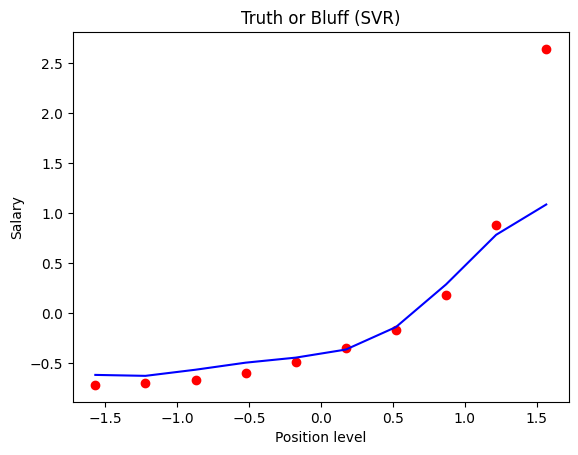

In [ ]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

<ipython-input-46-abe09048e5b5>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.


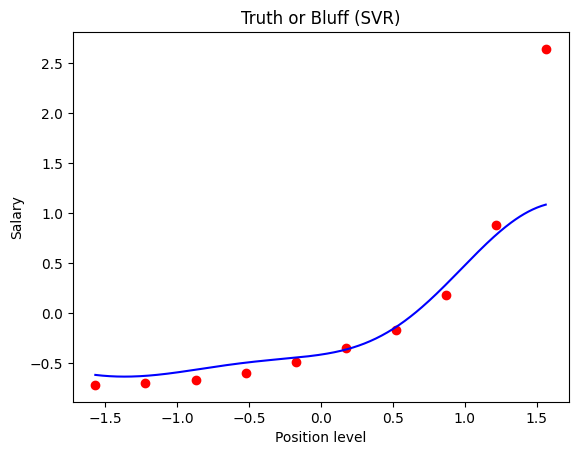

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()